### Starting Challenge

In [112]:
## Import basic libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Get and check database
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


## EDA
#### The exploratory data analysis helps to see get better comprehension

<AxesSubplot:>

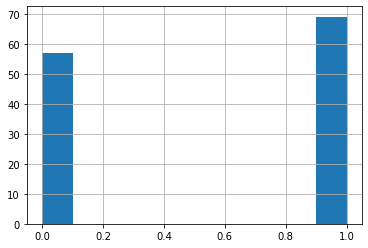

In [115]:
## Lets check the distribution of the target variable
df['Y'].hist()

In [116]:
## Target column is balanced and have no null values
print(df['Y'].value_counts())
df.isnull().sum()

1    69
0    57
Name: Y, dtype: int64


Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

<AxesSubplot:>

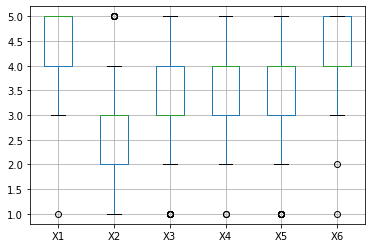

In [117]:
## Check values distribution trough columns
df.boxplot(column=["X1", "X2", "X3", "X4", "X5", "X6"])

In [118]:
## As we can see, higher values are in X1 and X6 columns, as well as lower values are in X2 column
## Lets check Pearson correlation 
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [119]:
## and check Basic statistics
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:>

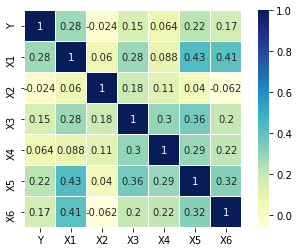

In [120]:
## Plot correlation heatmap (coldmap in this case)
sns.heatmap(df.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

In [121]:
## Check one-by-one
for i in range(0,len(df.columns)):
    for j in  range(0,len(df.columns)):
        if i!=j:
            corr_1=np.abs(df[df.columns[i]].corr(df[df.columns[j]]))
            if corr_1 >0.3:
                print(df.columns[i] , " have LOW correlation  with ", df.columns[j])
            elif corr_1>0.75:
                print( df.columns[i] , " have HIGH  correlated  with ", df.columns[j])
            elif corr_1 < -0.7:
                print( df.columns[i] , " have INVERTED correlation with ", df.columns[j])
            else:
                print(df.columns[i] , " have NO correlation with ", df.columns[j])

Y  have NO correlation with  X1
Y  have NO correlation with  X2
Y  have NO correlation with  X3
Y  have NO correlation with  X4
Y  have NO correlation with  X5
Y  have NO correlation with  X6
X1  have NO correlation with  Y
X1  have NO correlation with  X2
X1  have NO correlation with  X3
X1  have NO correlation with  X4
X1  have LOW correlation  with  X5
X1  have LOW correlation  with  X6
X2  have NO correlation with  Y
X2  have NO correlation with  X1
X2  have NO correlation with  X3
X2  have NO correlation with  X4
X2  have NO correlation with  X5
X2  have NO correlation with  X6
X3  have NO correlation with  Y
X3  have NO correlation with  X1
X3  have NO correlation with  X2
X3  have LOW correlation  with  X4
X3  have LOW correlation  with  X5
X3  have NO correlation with  X6
X4  have NO correlation with  Y
X4  have NO correlation with  X1
X4  have NO correlation with  X2
X4  have LOW correlation  with  X3
X4  have NO correlation with  X5
X4  have NO correlation with  X6
X5  have N

### The correlation varies between +1 (highly correlated) and -1 (inversely correlated), and is one of the simplest ways to begin to understand how the variables are related to each other. 
### I prefer building a Correlation Matrix so I can clearly see the variables relationship.
### BUT, In cases with low/desprezible correlation (like above), the matrix may not be a good measure. 

## Let´s compare models and see how accurate they can be:

In [122]:
## machine learning Libs
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_score, recall_score, auc, confusion_matrix
from xgboost import XGBClassifier, plot_importance
import warnings
warnings.filterwarnings('ignore')

In [123]:
df1 = df.copy()

In [124]:
df1.columns = df.columns

### Let´s normalize the dataset

In [125]:
x = df1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled = pd.DataFrame(x_scaled)
scaled.columns = df.columns

In [126]:
## Normalized data
X = scaled.drop(['Y'], axis = 1)
y = scaled['Y']

## Here we are definig Machine Learning Algorithms

### As we can see, the solution to the proposed challenge is the elaboration of a CLASSIFICATION  SUPERVISED MODEL
#### CLASSIFICATION (because it has a finite number, in this case, boolean, of target values),;
#### SUPERVISED model (since there is a target column) 

In [127]:
## Machine learning classification algorithms classifiers
MLA = [
    #Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier(),
    RandomForestClassifier(),

    #Gaussian Processes
    GaussianProcessClassifier(),
    
    #GLM
    LogisticRegression(),
    PassiveAggressiveClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    Perceptron(),
    
    #Navies Bayes
    BernoulliNB(),
    GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),
    
    #Trees    
    DecisionTreeClassifier(),
    ExtraTreeClassifier()
    ]

In [128]:
### Build a dataframe of prediction results, ordered by model accuracy 
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
X = scaled.drop(['Y'], axis = 1)
y = scaled['Y']
row_index = 0
for alg in MLA:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=102)
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
9,SGDClassifier,0.6310,0.5952,0.714286,0.576923,0.600962
7,PassiveAggressiveClassifier,0.6548,0.5952,0.666667,0.692308,0.564904
10,Perceptron,0.6905,0.5952,0.714286,0.576923,0.600962
1,BaggingClassifier,0.9405,0.5714,0.681818,0.576923,0.569712
14,SVC,0.7024,0.5476,0.684211,0.500000,0.562500
12,GaussianNB,0.5833,0.5476,0.652174,0.576923,0.538462
18,ExtraTreeClassifier,0.9524,0.5476,0.684211,0.500000,0.562500
6,LogisticRegression,0.6190,0.5238,0.615385,0.615385,0.495192
5,GaussianProcessClassifier,0.6548,0.5238,0.625000,0.576923,0.507212
4,RandomForestClassifier,0.9524,0.5238,0.666667,0.461538,0.543269


In [129]:
## Selecting the best performance in train
MLA_compare.sort_values(by = ['MLA Train Accuracy'], ascending = False, inplace = True)
MLA_compare.head(1)
winner_train = pd.DataFrame(MLA_compare.head(1))
print(winner_train[['MLA Name', 'MLA Train Accuracy']])

                 MLA Name  MLA Train Accuracy
4  RandomForestClassifier              0.9524


In [130]:
## Selecting the best performance in test
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare.head(1)
winner_test = pd.DataFrame(MLA_compare.head(1))
print(winner_test[['MLA Name', 'MLA Test Accuracy']])

      MLA Name  MLA Test Accuracy
10  Perceptron             0.5952


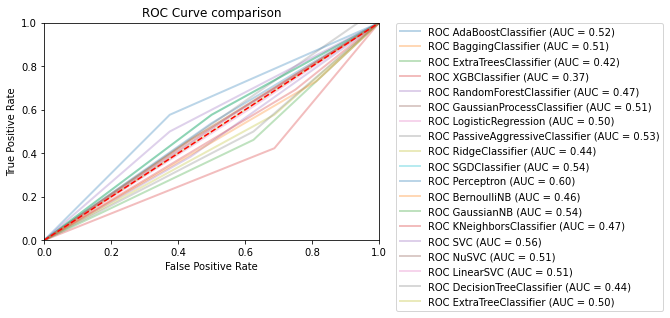

In [131]:
## Roc Curve comparison
index = 1
for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1
plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [133]:
#Select the algorithm to be tuned - Here we can reach the target by tunning, but the model will overfit
## Have to manually select from winner in TEST. 
tunealg = Perceptron()
tunealg.fit(x_train, y_train)
print("BEFORE tuning Training set score: {:.3f}". format(tunealg.score(x_train, y_train))) 
print("BEFORE tuning Test set score: {:.3f}". format(tunealg.score(x_test, y_test)))

BEFORE tuning Training set score: 0.690
BEFORE tuning Test set score: 0.595


## Accuracy of the best performance model  in test set could not reach 70%. 

# Why?

### The classifier doesn't do better than a random choice.There is a risk that there simply is no connection between features and class, exposed by the low correlation above showned.
### In cases like this, we need the  business expert who may infer the class based on given features (with an accuracy greater than a random classifier) for us to tune the model. 
### Usually getting more data rows or changing the classifier won't help to improve the model

### Let´s do feature selection, using FILTER method (bonus) to check if there is some information 

In [134]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [135]:
features = scaled.copy()

In [136]:
## We will apply filter method to select features
X = features.drop("Y", axis = 1)
y = features['Y']

In [137]:
mi = mutual_info_regression(X, y, n_neighbors = 2, random_state = 102)

<AxesSubplot:>

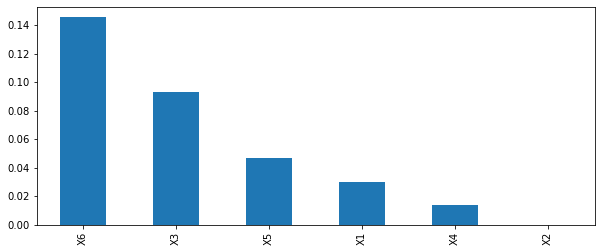

In [138]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

## As we can see the X2 column could be excluded in next survey